##This notebook is used to demultiplex the sequencing run into the corresponding samples, according to their barcodes

In [1]:
# Imports all the necessary programs
# screed for making databases
# pandas, which is a library of Python data analysis functions
# Counter tool for convenient and rapid tallies
# matplotlib for plotting
# numpy for basic computing in Python
# mpltools are more tools for matplotlib
import screed
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from mpltools import style

/opt/virt_env/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [2]:
# sets our style parameters to ggplot
style.use("ggplot")

In [3]:
# tells the notebook to show the output (graphics) from matplotlib inline (in the notebook)
%matplotlib inline

### Making reverse-complement of barcodes

In [42]:
from Bio import SeqIO
from Bio.Seq import Seq
# Importing the sequence-handling module

In [61]:
fh = open("../SeqData/MapFile.txt","r")
# Opens the map file to read it
record = fh.readlines()
# Goes through the file line by line
NewMap = []
# Creates empty list to fill
for line in record:
    entry = line.split("\r")
    # Splits each line out
    for item in entry:
        NewMap.append(item.split("\t"))
        # Splits the items in each line and adds them to our new map file
for tag in NewMap:
    tag[1]=str(Seq(tag[1]).reverse_complement())
    # For each line in our new map file, replaces barcode with reverse complement
print pd.DataFrame(NewMap, columns = ["ID","Barcode_RevC","Sample","Primer"])
    # Shows it worked
MapFileRevComp = pd.DataFrame(NewMap, columns = ["ID","Barcode_RevC","Sample","Primer"])
MapFileRevComp.to_csv("../SeqData/MapFileRevComp.txt", sep="\t", header=False, index=False)
# Now you have a Map File with reverse complemented barcodes just like your original.
fh.close()
# Keeping everything neat

          ID  Barcode_RevC Sample Primer
0      ITSW1  TATCGTTGACCA     W1    ITS
1    ITSW101  GCTGATGAGCTG   W101    ITS
2    ITSW103  ATCCCGAATTTG   W103    ITS
3    ITSW105  TCGAGGACTGCA   W105    ITS
4    ITSW107  GTCTAATTCCGA   W107    ITS
5    ITSW109  GAGGCTCATCAT   W109    ITS
6     ITSW11  CGATCCGTATTA    W11    ITS
7    ITSW111  ATGAGACTCCAC   W111    ITS
8    ITSW113  CTTGTGTCGATA   W113    ITS
9    ITSW115  ACGGGACATGCT   W115    ITS
10   ITSW117  CAGCTAGAACGC   W117    ITS
11   ITSW119  CCACCTACTCCA   W119    ITS
12   ITSW121  AGGCTACACGAC   W121    ITS
13   ITSW123  TGAGTCACTGGT   W123    ITS
14   ITSW125  AGCTGTTGTTTG   W125    ITS
15   ITSW127  GTTGGTCAATCT   W127    ITS
16   ITSW129  CGGAGCTATGGT   W129    ITS
17    ITSW13  ATTCCTGTGAGT    W13    ITS
18   ITSW131  TCCGAATTCACA   W131    ITS
19   ITSW133  TCCTCTGTCGAC   W133    ITS
20   ITSW135  GAATCTTCGAGC   W135    ITS
21   ITSW137  TGAGCCGGAATC   W137    ITS
22   ITSW139  GTCATATCGTAC   W139    ITS
23   ITSW143  TC

###Creating our databases to compare index file with sequence file

In [39]:
# This creates the database which it will query
# The database will have the sequence name, description, quality, and sequence itself (if those data are in the original files)
# The output will be the same file with NAME_screed
screed.read_fastq_sequences("../SeqData/Undetermined_S0_L001_I1_001.fastq")

<ScreedDB, '../SeqData/Undetermined_S0_L001_I1_001.fastq_screed'>

In [62]:
# tells the notebook where our index reads are
ir1 = "../SeqData/Undetermined_S0_L001_I1_001.fastq_screed"

In [63]:
# Loads our index reads database created above
ir1db = screed.ScreedDB(ir1)

In [65]:
!head ../SeqData/MapFileRevComp.txt

ITSW1	TATCGTTGACCA	W1	ITS
ITSW101	GCTGATGAGCTG	W101	ITS
ITSW103	ATCCCGAATTTG	W103	ITS
ITSW105	TCGAGGACTGCA	W105	ITS
ITSW107	GTCTAATTCCGA	W107	ITS
ITSW109	GAGGCTCATCAT	W109	ITS
ITSW11	CGATCCGTATTA	W11	ITS
ITSW111	ATGAGACTCCAC	W111	ITS
ITSW113	CTTGTGTCGATA	W113	ITS
ITSW115	ACGGGACATGCT	W115	ITS


In [66]:
# locating the tab delimited file with the index reads and the sample IDS
# Note that 0,1,2,3,4 are just row numbers
# I need to make this file in excel
# This step is making that information into a data frame (using panda), called df_map
# Note that the first items are identified by a "0" (Python uses a 0-index)
# Also note that the first column was made up by the program - not present in the initial file.
df_map = pd.read_csv("../SeqData/MapFileRevComp.txt", delimiter="\t", usecols=[0,1,2,3], names=["i1","SampleID","Cosm","Primer"])
# uses Pandas to read our csv file of our sequence data.
# We only had one indexed read, so we 
# prints the head of the dataframe we made called df_map
df_map[1:4]

,i1,SampleID,Cosm,Primer
1,ITSW101,GCTGATGAGCTG,W101,ITS
2,ITSW103,ATCCCGAATTTG,W103,ITS
3,ITSW105,TCGAGGACTGCA,W105,ITS


In [67]:
# map calls a function (lambda) for a sequence of items (zipped)
# lambda creates a function, into which x is input. 
# Here, we are getting whatever x was at 0, 1, and 2 (so the first three columns of our data), and adding the first two
# together (our indicies), and maintaining the second one (our sample IDs).
# "Zipping" links together three elements of the same length, effectively creating an array of vectors
# So, here, we have linked together the columns in our mapping dataframe, df_map.
# Basically, we link together the three columns, using zip, and then we concatenate the first two values
# at each place and keep the last one separate, using the lambda function we created here.
# This happens using the map function - the function called is defined by lambda, the sequence of items we look at 
# is defined by the zip function
# Dict is a data structure in Python, the "dictionary"
# A dictionary has unique keys that are linked to other data
# Here we are using our map output to make the dictionary. The map created two values - our combined indicies and ID.
# Thus, the map_d.keys at a given position will be the combined index primers,
# and the map_d returned when the map_d.keys at a given position is input, will be our sample ID.
map_d = dict(map(lambda x: (x[0],x[1]), zip(df_map.SampleID,df_map.i1)))
print map_d.keys()[50], map_d[map_d.keys()[50]]

ATCATCTGGGTT 16SW3


In [69]:
map_d['ATCATCTGGGTT']

'16SW3'

In [18]:
# We already created the database with our merged sequence files in merge_reads
# The output will be the same file with NAME_screed
# screed.read_fastq_sequences("../SeqData/pear_merged-2015-11-04.assembled.fastq")

<ScreedDB, '../../SeqData/pear_merged-2015-06-30.assembled.fastq_screed'>

In [70]:
# Loads the screed database
db = screed.ScreedDB("../SeqData/pear_merged-2015-11-04.assembled.fastq_screed")

### Beware: the script below will overwrite your fastq file - make a backup copy and make sure it works before running it!

In [71]:
# Sets a counting index and starts the number of unassigned reads at zero.
# Defines our output as our fastq file.
# Sets up a counter function, which is actually like a dictionary.
# Assigns our assembled sequence data
counter = 0
unassigned = 0
cnt = Counter()
fq = "../SeqData/pear_merged-2015-11-04.assembled.fastq"

# "w" means we are opening the file to "w"rite
with open(fq, "w") as out:
# for each record in our database (of sequence reads, est. above) that we go through iteratively...
  for rec in db.itervalues(): 
        # We get the name of this record, and then find that same name in our index db, and get the associated sequence
        index = ir1db[rec["name"]]["sequence"]
        # We take the index sequence found above (matching the sample's name), and find it in our map file
        # This should spit out the ID of the sample associated with these indicies, which we then join to
        # an underscore, and the current counter value (which number sequence is this?)
        try:
            new_name = map_d[index] + "_" + str(counter) #case sensitive
            # If we couldn't find the index name in our dictionary map file, we say it was unassigned, and tally it.
        except KeyError:
            unassigned += 1
            continue
            # Resetting to continue
        counter += 1
        # map_d[index_etc.lower] should give us the sample name we assigned to that index set.
        # We feed that into the counter - not quite sure what happens
        # We also increase [what?] by 1.
        cnt[map_d[index]] += 1 #case sensitive
        # We define s and q as the sequence and accuracy values (from our screed db) 
        s, q = rec["sequence"], rec["quality"]
        # The output written to the file we called fn will be all this..not quite sure what's going on.
        out.write("@%s orig_name=%s\n%s\n+\n%s\n"%(new_name,rec["name"],s,q))
        # Reports how many reads didn't match the mapping file. Note that we require an exact match here.
print "Unable to assign %s reads to samples"%unassigned
# The final output should be still a fastq file but now with the sample ID attached.
# For now it is called pear_merged-2014-03-25.assembled.demult.fastq

Unable to assign 8321422 reads to samples


8,321,422 out of 13,986,681 reads were from my samples (others are from other projects on this run)

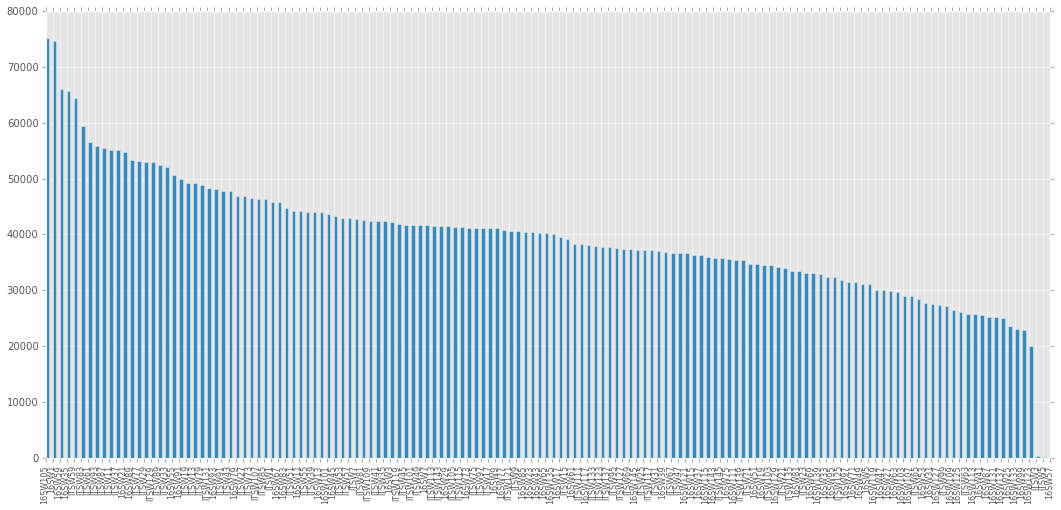

In [72]:
# Makes a plot of read counts organized by index
# Seems like it worked okay - lowest 12 reads <50,000 counts.
X = np.arange(len(cnt.keys()))
Y = [v for k, v in cnt.most_common()]
fig = plt.figure()
fig.set_size_inches((18,8))
ax = fig.add_subplot(111)
bars = ax.bar(X, Y, width=0.5)
xlims = ax.set_xlim((X.min(), X.max()))
xt = ax.set_xticks(X)

xtl = ax.set_xticklabels([k for k, v in cnt.most_common()], rotation=90, ha="center", size=8)

### Looks pretty great, actually. What are the lowest ones?

In [93]:
X = np.arange(len(cnt.keys()))
Y = [v for k, v in cnt.most_common()]
Z = [k for k, v in cnt.most_common()]
print Z
print Y

['16SW105', '16SW1', '16SW59', '16SW35', 'ITSW59', 'ITSW83', 'ITSW61', 'ITSW93', 'ITSW87', 'ITSW11', 'ITSW37', '16SW21', '16SW89', 'ITSW77', 'ITSW29', 'ITSW129', 'ITSW89', 'ITSW33', '16SW55', '16SW91', 'ITSW19', 'ITSW13', 'ITSW79', 'ITSW131', '16SW93', 'ITSW91', 'ITSW43', '16SW79', 'ITSW27', 'ITSW73', 'ITSW107', 'ITSW85', 'ITSW1', '16SW67', '16SW83', 'ITSW51', '16SW11', 'ITSW55', 'ITSW39', '16SW13', '16SW101', '16SW45', 'ITSW53', 'ITSW57', 'ITSW7', 'ITSW81', 'ITSW109', 'ITSW41', 'ITSW35', '16SW3', 'ITSW119', 'ITSW45', 'ITSW101', 'ITSW49', '16SW7', 'ITSW113', 'ITSW143', '16SW29', 'ITSW105', 'ITSW115', '16SW73', 'ITSW75', 'ITSW97', 'ITSW17', '16SW9', '16SW77', 'ITSW121', 'ITSW9', '16SW85', '16SW23', '16SW43', '16SW65', '16SW135', '16SW17', 'ITSW15', '16SW61', 'ITSW111', '16SW117', 'ITSW133', 'ITSW123', 'ITSW137', 'ITSW95', 'ITSW127', 'ITSW69', '16SW145', 'ITSW25', 'ITSW117', 'ITSW31', '16SW39', 'ITSW67', 'ITSW47', '16SW121', '16SW15', '16SW37', '16SW115', '16SW143', 'ITSW145', '16SW75', 

#### So it looks like sample IDs W3 and W5 for ITS had 379 and 186 sequences, while W57 for 16S had only 12. Next lowest is W123 for 16S with 20,079, so that's great - ranges up to 75,245!

In [73]:
!head ../SeqData/pear_merged-2015-11-04.assembled.fastq

@ITSW21_0 orig_name=M01056:160:000000000-AFBA8:1:1101:17506:1569
TCAGTGAATCATCGAGTCTTTGAACGCACATTGCGCCCCCTGGTATTCCGGGGGGCATGCCTGTCCGAGCGTCATTGCTGCCCTCAAGCCCGGCTTGTGTGTTGGGCCCCGTCCTCCGATTCCGGGGGACGGGCCCGAAAGGCAGCGGCGGCACCGCGTCCGGTCCTCGAGCGTATGGGGCTTTGTCACCCGCTCTGTAGGCCCGGCAGGCGCTTGCCGATCAACCAAAACTTTTTTCCAGGTTGACCTCGGATCAGGTAGGGATACCCGCTGAACATAAGAATATCAATAAGCGGAGGATCGA
+
>>11A313BDDFGB11FGGGG331B0A0A0FG1A00AAAAE//F1FGEB0///==<I?IIFG?GFCFF99;<IFIG<IGIDIEGGI>>0::9E:II9FHI:IFF:9EGG:EI9IIIIE9GIII;G99FGEEE;9G9EIIIE9EE9E99FEE9GEE9EFE9E<IG;FIE:HHHHHII<II<<IIIII=>I=GBHIIIBH?I/G==I<;/I;G;;GI>==IB>;IB=HGIII?I;HIII>>FAIIIBB=GI>ABB01GFB1GFAFF/A000133ADD133FD33B3B33GB1EA>1BDD1>>1111
@ITSW37_1 orig_name=M01056:160:000000000-AFBA8:1:1101:14570:1576
CACTCAGTGAATCATCGAGTCTTTGAACGCACATTGCGCCCCCTGGTATTCCGGGGGGCATGCCTGTCCGAGCGTCATTGCTGCCCTCAAGCCCGGCTTGTGTGTTGGGTCTCGTCCCCCTTCCCGGGGGGACGGGCCCGAAAGGCAGCGGCGGCACCGCGTCCGGTCCTCGAGCGTATGGGGCTTTGTCACCCGCTCTGTAGGCCCGGCCGGCGCTTGCCGATCAACCAAAACTTTTTTCCAGGTTGACCTCGGATC